In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv('../Data/Telco-Customer-Churn.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
pd.set_option('display.max_columns', None)

In [64]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [65]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})

In [67]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [68]:
cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in cols:
    print((df[col] == 0).sum())

5901
11
0
0


In [69]:
median_val = df['tenure'].median()
df['tenure'] = df['tenure'].replace(0, median_val)

In [70]:
(df['tenure'] == 0).sum()

0

In [71]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.416442,64.761692
std,0.368612,24.526454,30.090047
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='tenure', ylabel='Count'>

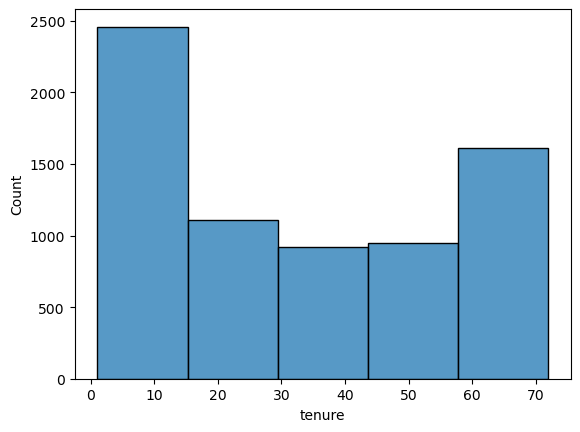

In [72]:
sns.histplot(bins = 5, x='tenure', data=df)

<Axes: xlabel='Contract', ylabel='count'>

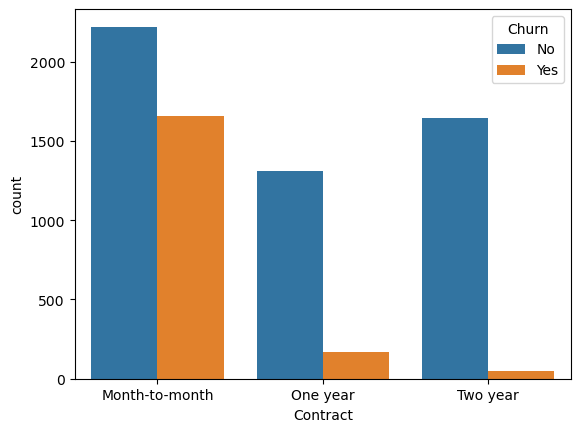

In [73]:
sns.countplot(x='Contract', hue='Churn', data=df)

In [74]:
df.duplicated().sum()

0

In [75]:
# Converting categorical data into numerical data
# df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
# df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
# df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
# df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
# df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1})
# df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
# df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1})
# df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1})
# df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1})
# df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1})
# df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1})
# df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1})
# df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
# df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
# df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)':3})
# df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [76]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [78]:
# If the column having float values but their data type is showing object then most of the cases blank spaces are their in values 
# So first remove that and then convert data type
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [79]:
df.drop('customerID', axis=1, inplace=True)

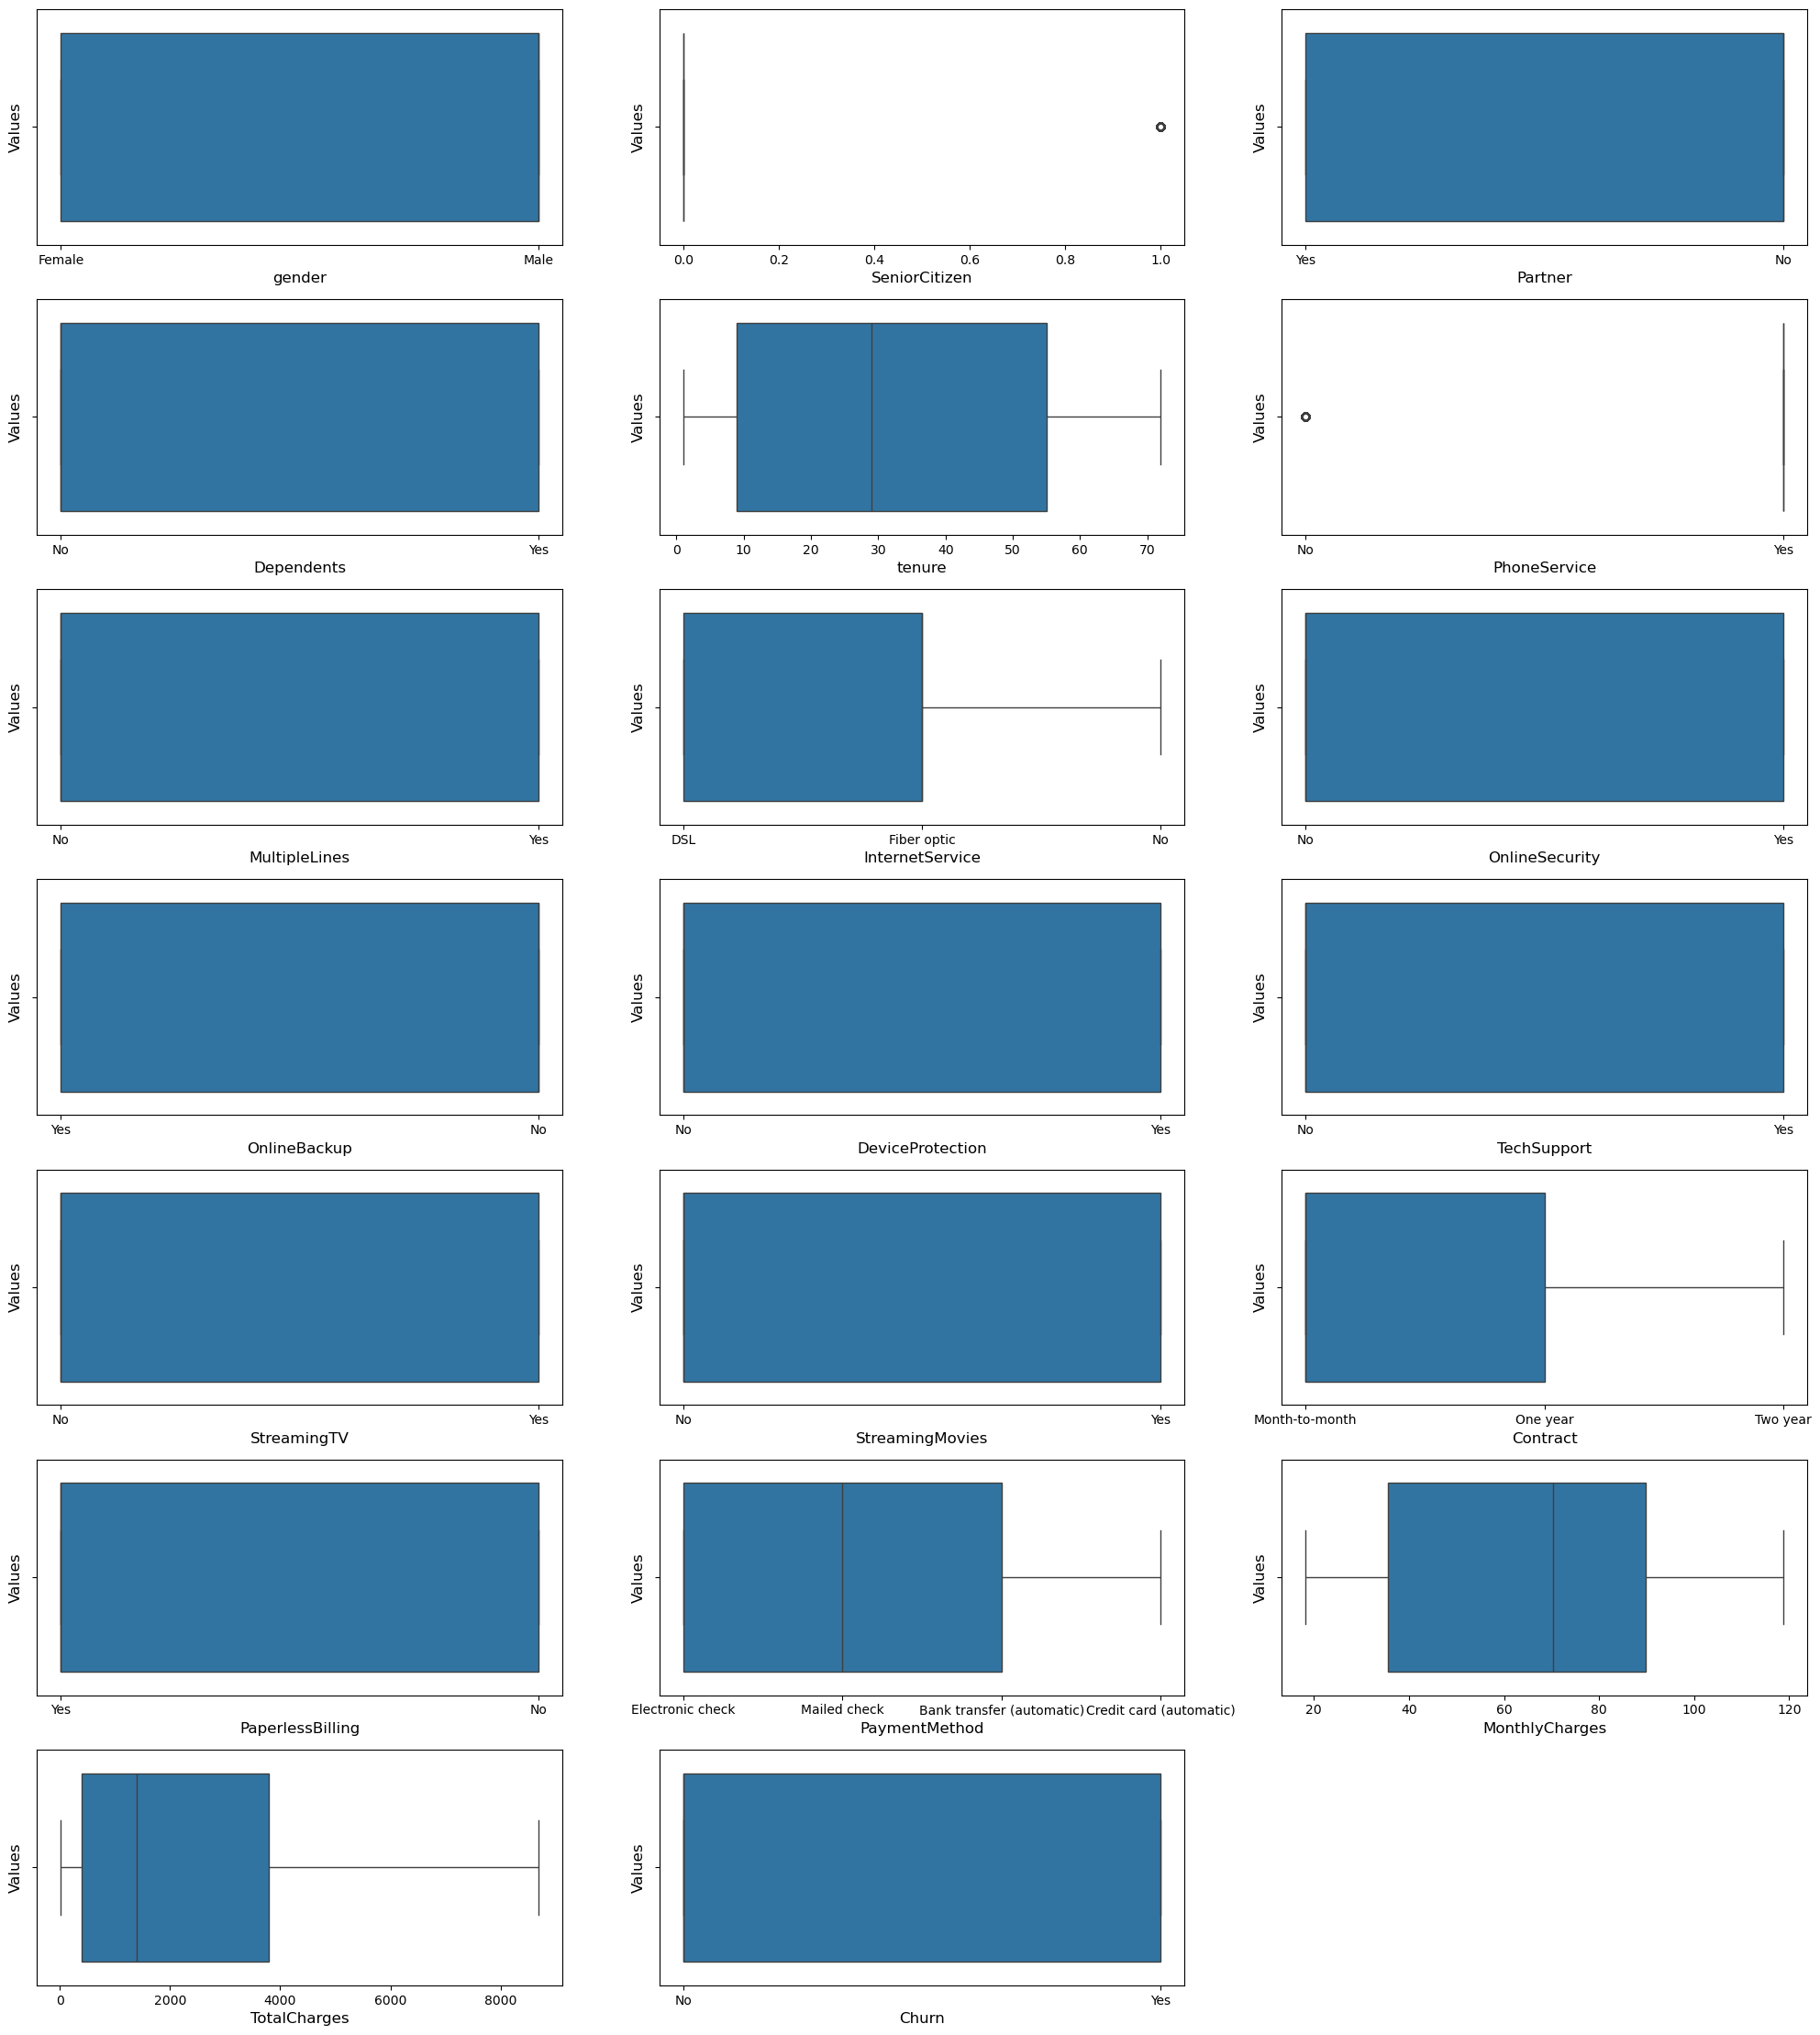

In [80]:
plt.figure(figsize=(20, 25), facecolor='white') # set figure size + background color
plotnumber = 1 # initialize

for column in  df:
    if plotnumber <= 20: # only 9 subplots (3x3 grid)
        ax = plt.subplot(8,3, plotnumber)
        sns.boxplot(x=df[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)        
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

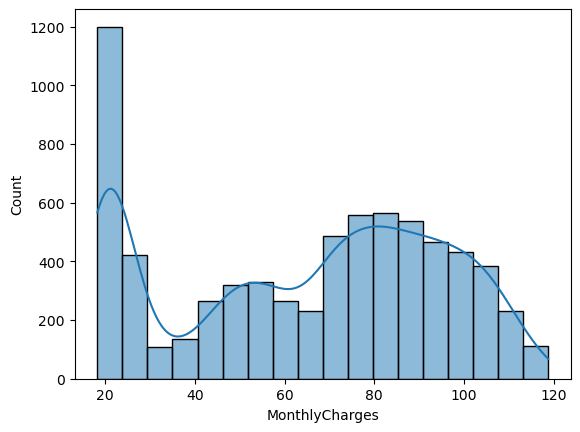

In [81]:
sns.histplot(data=df, x='MonthlyCharges', kde=True)

In [82]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'] + 1)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

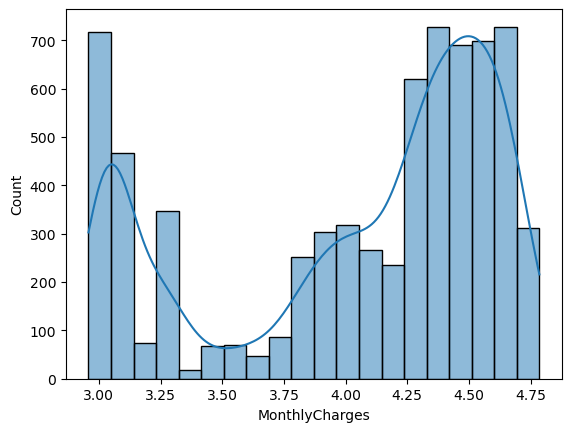

In [83]:
sns.histplot(data=df, x='MonthlyCharges', kde=True)

In [84]:
df.drop(['TotalCharges'], axis=1, inplace=True)

In [85]:
# from sklearn.preprocessing import MinMaxScaler

# sc = MinMaxScaler()
# X = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
#         'MultipleLines', 'InternetService',
#        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#        'PaymentMethod', 'Churn']
# cols_to_scale = ['tenure', 'MonthlyCharges']
# scaled_data = sc.fit_transform(df[cols_to_scale])

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [87]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,3.429137,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,4.059581,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,4.004602,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,3.768153,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,4.272491,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,4.452019,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,4.646312,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,3.421000,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,4.322807,1


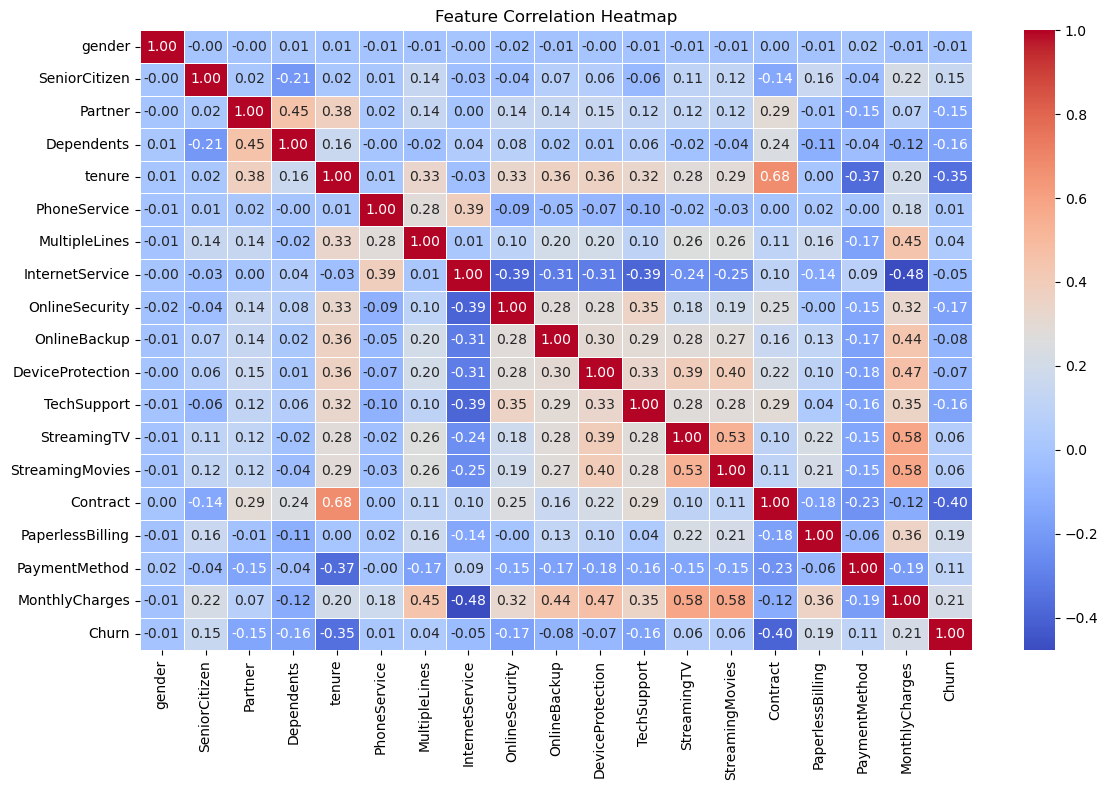

In [88]:
corr_matrix = df.corr(method="pearson")

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [89]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [90]:
# minority = df[df.Churn == 1]
# n_needed = df[df.Churn == 0].shape[0] - minority.shape[0]
# minority_upsampled = minority.sample(n=n_needed, replace=True, random_state=42)
# df_balanced = pd.concat([df, minority_upsampled], ignore_index=True)
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
# print(df_balanced['Churn'].value_counts())

In [91]:
x = df.iloc[:,:-1] 
y = df.Churn 

In [92]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,3.429137
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,4.059581
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,4.004602
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,3.768153
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,4.272491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,4.452019
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,4.646312
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,3.421000
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,4.322807


In [93]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [95]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [96]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.8, penalty='l2', class_weight='balanced')
clf.fit(x_train_scaled, y_train)

LogisticRegression(C=0.8, class_weight='balanced')

In [97]:
y_pred = clf.predict(x_test_scaled)

In [98]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score

In [100]:
acc = accuracy_score(y_test, y_pred)
acc

0.752306600425834

In [101]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[751, 285],
       [ 64, 309]], dtype=int64)

In [102]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,751,285
1,64,309


In [103]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

In [104]:
recall = recall_score(y_test, y_pred)
recall

0.8284182305630027

In [105]:
precision = precision_score(y_test, y_pred)
precision

0.5202020202020202

In [106]:
f1 = f1_score(y_test, y_pred)
f1

0.6390899689762151

In [107]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



In [108]:
y_p = pd.Series(y_pred)

In [109]:
y_p.value_counts()

0    815
1    594
Name: count, dtype: int64

## Try for random forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight={0: 1, 1: 2}, 
    max_depth=8,
    min_samples_leaf=10, 
    min_samples_split=10,
    n_estimators=300, 
    n_jobs=-1, 
    random_state=42
)

rf.fit(x_train_scaled, y_train)

# Target:
# Recall (Yes) ≥ 0.80
# FN < 60

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=8,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [112]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [8, 12, None],
    'min_samples_leaf': [3, 5, 10],
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    rf,
    param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

grid.fit(x_train_scaled, y_train)

best_rf = grid.best_estimator_
best_rf.fit(x_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=8,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [182]:
y_prob = best_rf.predict_proba(x_test_scaled)[:, 1]

THRESHOLD = 0.41
y_pred = (y_prob >= THRESHOLD).astype(int)
print(confusion_matrix(y_test, y_pred))
# We need to make a script to work model according to threshold

[[753 283]
 [ 55 318]]


In [114]:
y_pred = best_rf.predict(x_test_scaled)
confusion_matrix(y_test, y_pred)

array([[847, 189],
       [ 92, 281]], dtype=int64)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1036
           1       0.60      0.75      0.67       373

    accuracy                           0.80      1409
   macro avg       0.75      0.79      0.76      1409
weighted avg       0.82      0.80      0.81      1409



## XG Boost

In [117]:
from xgboost import XGBClassifier

In [118]:
xgb = XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.5,
    reg_lambda=1.0,
    scale_pos_weight=5174/1869,  # imbalance ratio (No / Yes)
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

In [119]:
xgb.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)

In [184]:
from sklearn.metrics import confusion_matrix

y_prob = xgb.predict_proba(x_test_scaled)[:, 1]

THRESHOLD_XG = 0.45  # start between 0.35–0.45
y_pred = (y_prob >= THRESHOLD).astype(int)

print(confusion_matrix(y_test, y_pred))

[[719 317]
 [ 61 312]]


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.52      0.81      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [ ]:
import joblib

model_artifact = {
    "model": best_rf,
    "scaler": sc,
    "threshold": THRESHOLD
}

joblib.dump(model_artifact, "churn_model.pkl")

['churn_model.pkl']